In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

from rayopt import *

np.set_printoptions(precision=3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sqlalchemy import func
l = Library.one()
q = l.session.query(library.Glass
                   ).filter(func.abs(library.Glass.nd - 1.7725) < .0001
                   ).filter(func.abs(library.Glass.vd - 49.61) < .01)
for g in q:
    print(g.name, g.catalog.source, g.catalog.name)

H-LAF50B zemax CDGM
E-LASF016 zemax HIKARI
H-LAF50 zemax NHG
H-LAF50A zemax NHG
LAH66 zemax OHARA
N-LAF34 zemax SCHOTT
LASFN7 zemax Sumita
H-LAF50A oslo CDGM
J-LASF016 oslo HIKARI
TAF1 oslo HOYA
E-LASF016 oslo Obsolete
H_TAF1 oslo Obsolete
O_S-LAH66 oslo Obsolete
K_ELASF016 oslo Obsolete
U_LASFN7 oslo Obsolete
S-LAH66 oslo OHARA
N-LAF34 oslo SCHOTT
K-LASFN7 oslo SUMITA


In [9]:
columns = "radius roc distance material".split()
text = """
30 50. 5. air
27 85. 2.04 HIKARI/E-SK16
15.2 16.45 8.32 air
17 61.18 1.7 HIKARI/E-LASF09
13 20.15 10.316 air
11 -204. 3.43 HIKARI/E-LAF02
11 -31.26 0.25 air
11 -27. 2.78 HIKARI/E-LASF016
8 11.48 4.93 HIKARI/E-SF10
8 -55.84 5.865 air
6 59.67 2.57 HIKARI/E-KF6
6 -14.2 1.41 HIKARI/E-LASF05
6 -76. 3.66 air
6 0 6.467 air
9 -1732 1.49 HIKARI/E-SF03
9 29.9 4.02 HIKARI/E-FK01
9 -21.55 .19 air
10 44.74 3.21 HIKARI/E-LAK7
10 -44.74 41.1 air
20 0 0 air
"""

s = system_from_text(text, columns, shifts={"distance": 1})
s.description = "Nikon AF DX Fisheye-Nikkor 10.5mm f/2.8G ED"
s.object = InfiniteConjugate(angle_deg=91., projection="equisolid",
                             pupil=dict(radius=10.5/2.8/2, aim=True))
s.fields = 0, .7, 1.
s.stop = 13
s.update()
print(s)

System: Nikon AF DX Fisheye-Nikkor 10.5mm f/2.8G ED
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 91°
 Projection: equisolid
 Pupil:
   Pupil Distance: 20.9267
   Refractive Index: 1.00028
   Aim: True
   Radius: 1.875
Image:
 Radius: 20
 Update Radius: True
 Pupil:
   Pupil Distance: -63.1559
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 11.2843
Stop: 13
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0         50         60         basic/air   1.000   1.000   89.30
 1 S          5         85         54     HIKARI/E-SK16   1.620   1.620   60.29
 2 S       2.04      16.45       30.4         basic/air   1.000   1.000   89.30
 3 S       8.32      61.18         34   HIKARI/E-LASF09   1.816   1.816   46.62
 4 S        1.7      20.15         26         basic/air   1.000   1.000   89.30
 5 S     10.316       -204         22    HIKARI/E-LAF02   1.720   1.720   43.68
 6 S       3.43   

/home/rj/work/nist/pyrayopt/rayopt/utils.py:67: RuntimeWarning: invalid value encountered in sqrt
  u1 = u/np.sqrt(1 - u2)


/home/rj/work/nist/pyrayopt/rayopt/utils.py:67: RuntimeWarning: invalid value encountered in sqrt
  u1 = u/np.sqrt(1 - u2)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:245: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:250: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.wavelength/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:495: RuntimeWarning: invalid value encountered in sqrt
  g = np.sqrt(np.square(d) - e*f)
/home/rj/work/nist/pyrayopt/rayopt/elements.py:366: RuntimeWarning: invalid value encountered in sqrt
  g = -a + np.sign(mu)*np.sqrt(np.square(a) - b)
/home/rj/work/nist/pyrayopt/rayopt/elements.py:208: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:379: RuntimeWarning: invalid value encountered in true_di

System: Nikon AF DX Fisheye-Nikkor 10.5mm f/2.8G ED
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 91°
 Projection: equisolid
 Pupil:
   Pupil Distance: 20.9267
   Refractive Index: 1.00028
   Aim: True
   Radius: 1.875
Image:
 Radius: 20
 Update Radius: True
 Pupil:
   Pupil Distance: -63.1559
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 11.2843
Stop: 13
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0         50         60         basic/air   1.000   1.000   89.30
 1 S          5         85         54     HIKARI/E-SK16   1.620   1.620   60.29
 2 S       2.04      16.45       30.4         basic/air   1.000   1.000   89.30
 3 S       8.32      61.18         34   HIKARI/E-LASF09   1.816   1.816   46.62
 4 S        1.7      20.15         26         basic/air   1.000   1.000   89.30
 5 S     10.316       -204         22    HIKARI/E-LAF02   1.720   1.720   43.68
 6 S       3.43   

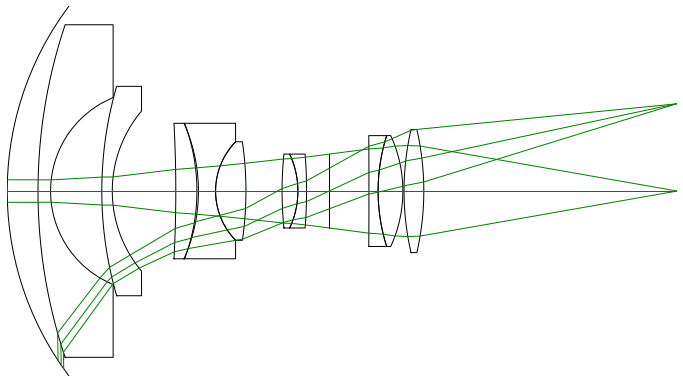

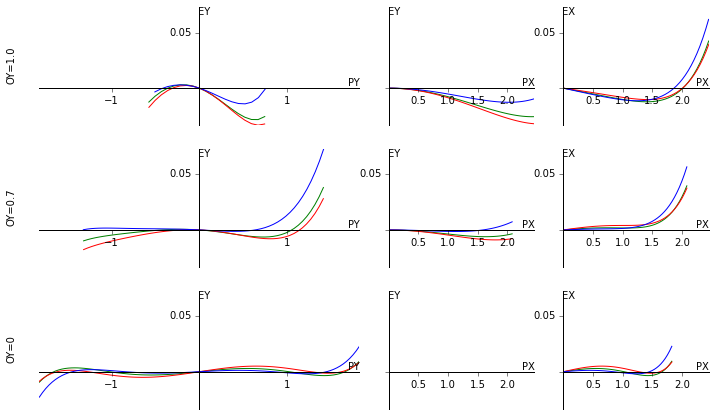

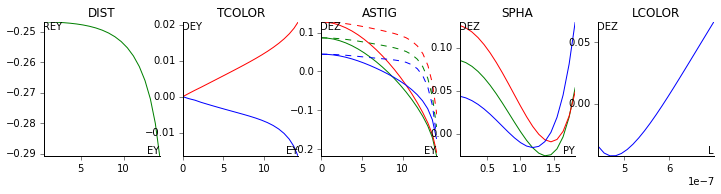

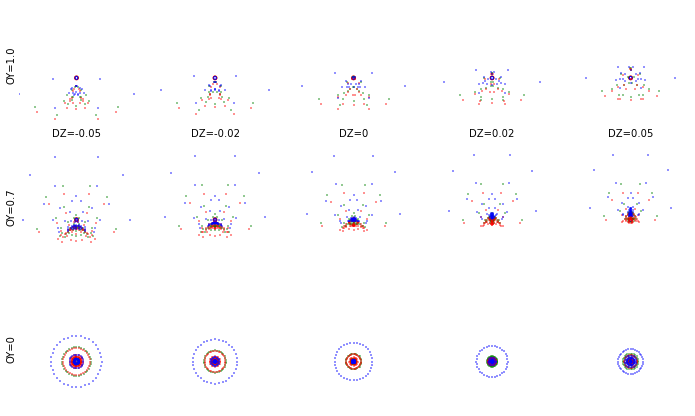

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


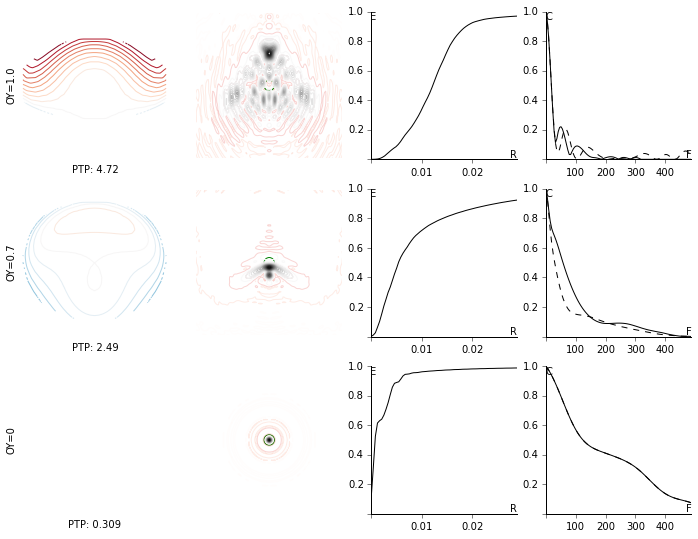

In [10]:
Analysis(s)

In [12]:
import copy
r = System(copy.deepcopy(s[:s.stop + 1]))
r.reverse()
#r.insert(0, Spheroid(material=air, radius=r[0].radius))
#r[1].distance = .1
r.stop = 0
r.object = FiniteConjugate(radius=r[r.stop].radius)
r.image = FiniteConjugate(radius=r[-1].radius)
r.update()

/home/rj/work/nist/pyrayopt/rayopt/pupils.py:89: RuntimeWarning: invalid value encountered in double_scalars
  return self.radius/self.distance
/home/rj/work/nist/pyrayopt/rayopt/conjugates.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  return self.radius/self.pupil.distance


System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0
Object:
 Radius: 6
 Pupil:
   Pupil Distance: 0
   Refractive Index: 1.00028
   Radius: 0
Image:
 Radius: 30
 Pupil:
   Pupil Distance: -20.9267
   Refractive Index: 1.00028
   Radius: 0
Stop: 0
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf         12         basic/air   1.000   1.000   89.30
 1 S       3.66         76         12   HIKARI/E-LASF05   1.835   1.835   42.72
 2 S       1.41       14.2         12      HIKARI/E-KF6   1.517   1.517   52.30
 3 S       2.57     -59.67         12         basic/air   1.000   1.000   89.30
 4 S      5.865      55.84         16     HIKARI/E-SF10   1.728   1.728   28.46
 5 S       4.93     -11.48         16  HIKARI/E-LASF016   1.772   1.772   49.61
 6 S       2.78         27         22         basic/air   1.000   1.000   89.30
 7 S       0.25      31.26         22    HIKARI/E-LAF02   1.720   1.720   43.68
 8 S       3

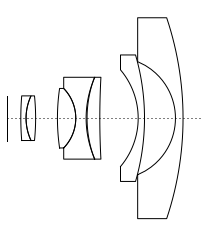

In [13]:
r.plot(plt.gca())
print(str(r))

In [14]:
n, m = 31, 7
g = GeometricTrace(r)
y = np.linspace(-1, 1, n)*r[r.stop].radius
y = np.c_[0*y, y][:, None, :]
u = np.linspace(0, 1, m)*.43
u = np.r_[u, u + 1e-3]
u = np.c_[0*u, u][None, :, :]
y, u = np.broadcast_arrays(y, u)
y, u = y.reshape(-1, 2), u.reshape(-1, 2)
g.rays_given(y, u)
g.propagate(clip=True)

/home/rj/work/nist/pyrayopt/rayopt/elements.py:208: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2


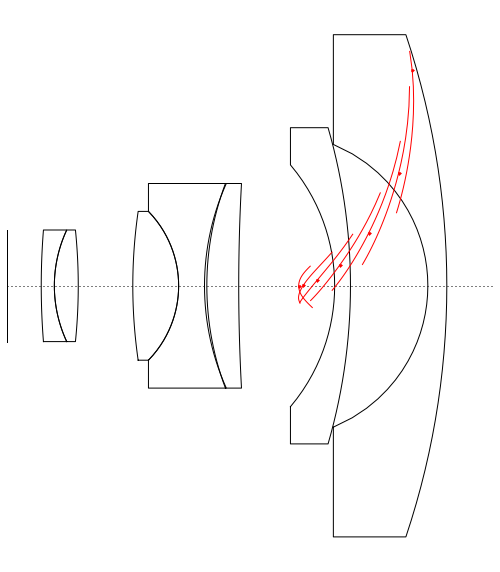

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
r.plot(ax)
#g.plot(ax)
y = g.y[-1].reshape(n, 2, m, 3)
u = g.u[-1].reshape(n, 2, m, 3)
l = (y[:, 1, :, 1] - y[:, 0, :, 1])*u[:, 1, :, 2]
l += (y[:, 0, :, 2] - y[:, 1, :, 2])*u[:, 1, :, 1]
l /= u[:, 0, :, 1]*u[:, 1, :, 2] - u[:, 0, :, 2]*u[:, 1, :, 1]
i = r[-1].from_normal(y + l[:, None, :, None]*u) + r.origins[-1]
ax.plot(i[:, 0, :, 2], i[:, 0, :, 1], "r-");
ax.plot(i[n//2, 0, :, 2], i[n//2, 0, :, 1], "r.");
#i = np.r_[r[-1].from_normal(y) + r.origins[-1], i].reshape(2, -1, 3)
#ax.plot(i[:, :, 2], i[:, :, 1], "r-");